<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/COHORT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What's in this Notebook
The data in this notebook is of *Online Retail of some UK-based*. The data is at transactional level. Here I covered some customer segmentation technique - 
1. Cohort Analysis
2. RFM Analysis
3. k-Means Clustering

Also data pre-processing and cleaning is done first and then all the above discussed technqiue is implemented.<br>
All the necessary steps and explaination is provided with commenting on the code as well.<br>
`If you like this notebook UPVOTE it and for any reviews and doubts please leave a comment`.

In [1]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [6]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [7]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder.

In [8]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download vijayuv/onlineretail
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”

 69% 5.00M/7.20M [00:00<00:00, 15.3MB/s]
100% 7.20M/7.20M [00:00<00:00, 21.5MB/s]


In [9]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/onlineretail.zip") # esta es la dirección donde esta el zip
datazip.extract("OnlineRetail.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 

'/content/OnlineRetail.csv'

In [10]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541909, 8)

In [14]:
# looking at the overall picture
df.info()
# tiene toda la pinta que tenemos valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [29]:
# voy a cambiar el campo invoicedate a fecha. 
df.InvoiceDate = pd.to_datetime(df.InvoiceDate) # aqui lo estoy convirtiendo

In [30]:
# checking the number of missing values in each column
df.isnull().sum()

# como podemos ver debajo tenemos 1254 description sin valores y y 135080 customerid null

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
dtype: int64

## BASIC CLEANING

In [31]:
# count of duplicated rows in the data
df.duplicated().sum()

0

In [32]:
# removing the duplicate rows
df = df[~df.duplicated()]
df.shape
# NOS QUEDAMOS CON 536641 FILAS Y 8 VARIABLES. 

(526054, 8)

In [33]:
# these are the transactions that have negative quantity which indicates returned or cancelled orders
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [34]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape
# despues de quitarnos las devoluciones el shape es el de debajo. 

(526054, 8)

In [35]:
# checking the number of unique transactions
# though there are more than 5 lakh entries but the number of transaction happened is 21892
df.InvoiceNo.nunique()
# debajo vemos que el numero de facturas unicas es 22064. es decir 22064 facturas generan 527390 filas

20728

In [36]:
# checking the unique stock ids in the data or number of unqiue item sold by retailer
df.StockCode.nunique()
# este el numero de articulos diferentes. 

3941

In [37]:
# top 10 stock ids that sold the most
df.StockCode.value_counts().head(10)
# con esto sacamos por numeros de lineas que articulos son los que más se venden

85123A    2258
85099B    2112
22423     2009
47566     1700
20725     1582
84879     1476
22197     1418
22720     1394
21212     1352
22383     1307
Name: StockCode, dtype: int64

In [38]:
# looking at the distribution of the quantity
# we seen that there is negative value which might indicate return orders
df.Quantity.describe()

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [39]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
df[df['Quantity']<0]
# hay 1336 filas que tienen valores negativos en cantidad. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [40]:
# keeping only those transactions that have successfully ordered
df = df[df['Quantity']>=0]
df.shape
# nos quedamos solo con las positivas

(526054, 8)

In [41]:
print('The minimum date is:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The minimum date is: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [42]:
# checking the distribution of unit price
df.UnitPrice.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
# con esto sacamos los percentiles del precio

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [43]:
# we see that more than 90% have country as UK which is obvious as the retailer is UK based
df.Country.value_counts(normalize=True)

# vemos que más del 90% de las transacciones son de United Kingdom. 

United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
European C

In [44]:
# putting UK as one country and combine rest countries into one category
df['Country'] = df['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)
# si es United Kingdom el nombre de country será ese, si no lo es será otro. 

United Kingdom    0.914627
Others            0.085373
Name: Country, dtype: float64

In [45]:
# checking the number of unique item list
df.Description.nunique()

4077

In [46]:
# top 10 item sold
df.Description.value_counts().head(10)
# por descripción estos son los que más lineas tienen. 

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64

In [47]:
# there are cases where the descriptions contains some code/name which are not directly refers to sales
# checking the data where description = ? and it is noted that customerid is NaN and unit price is 0
df[df['Description'].str.startswith('?')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kingdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kingdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kingdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kingdom


In [49]:
# removing all the above entries
df = df[df['Description'].str.startswith('?')!=True]
df.shape
# todas aquellas filas con description en interrogación, las quitamos. es decir simpre que sea diferente de true. 

(526048, 8)

In [50]:
# checking the data where description = * and it is noted that customerid is NaN
df[df['Description'].str.startswith('*')==True]
# aqui las que empiezan por *

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kingdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kingdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kingdom


In [51]:
# replacing with appropriate name
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))
# con esto lo que hacemos en reemplazarlas con otro nombre

In [52]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.islower()==True]['Description'].value_counts()
# aqui todas las descripciones que empiezan por minuscula. 

check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate online order

In [54]:
# removing all the above noises
df = df[df['Description'].str.islower()!=True]
df.shape

(525920, 8)

In [55]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: Description, dtype: int64

In [56]:
# removing all the above listed noises
df = df[df['Description'].str.istitle()!=True]
df.shape
# estamos quitando todas las que no empiecen por mayusculas. 

(525452, 8)

In [57]:
df['Description'] = df['Description'].str.strip()

In [58]:
# count of unique customer
df.CustomerID.nunique()  # tenemos 4335 clientes

4335

In [59]:
# checking where customer id is null
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [60]:
# removing entries where customer id is null
df = df[~df.CustomerID.isnull()]
df.shape

(392353, 8)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [62]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [63]:
# checking random 5 rows from data
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
358839,568164,23225,CHERUB HEART DECORATION SILVER,12,2011-09-25 12:39:00,0.83,14561.0,United Kingdom
407686,571909,16054,POPART RECT PENCIL SHARPENER ASST,2,2011-10-19 15:08:00,0.12,15006.0,United Kingdom
458544,575842,22555,PLASTERS IN TIN STRONGMAN,5,2011-11-11 12:01:00,1.65,15024.0,United Kingdom
407713,571909,21902,"KEY FOB , FRONT DOOR",1,2011-10-19 15:08:00,0.65,15006.0,United Kingdom
533242,581020,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,100,2011-12-07 10:12:00,1.79,17511.0,United Kingdom


## EDA

In [64]:
# creating some columns for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


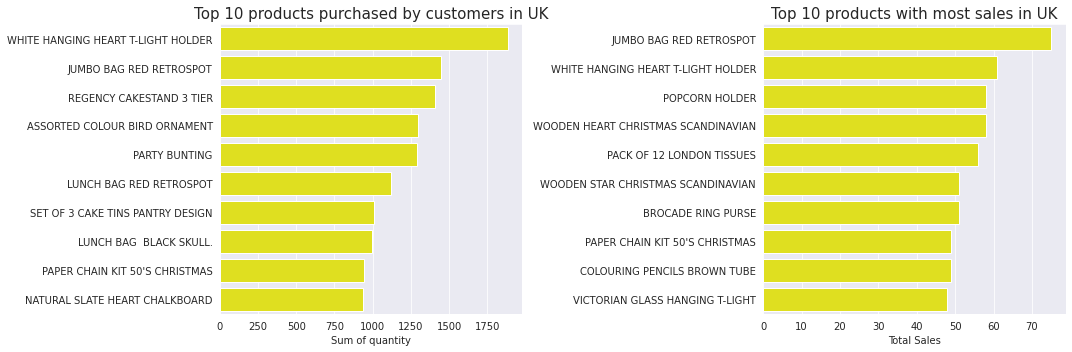

In [66]:
column = ['InvoiceNo','Amount']  # prefijamos las dos variables que vamos a coger, metiendolas en una varialbes que es una lista. 

plt.figure(figsize=(15,5)) # tamaño del gráfico
for i,j in enumerate(column): # para cada fila y columna. 
    plt.subplot(1,2,i+1) 
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()